# Exploração de Dados

Notebook destinado a exploração de dados usados no treinament do modelo.

In [1]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px

import geopandas as gpd
from src.utils import read_tiff

import rasterio

## mask.tif

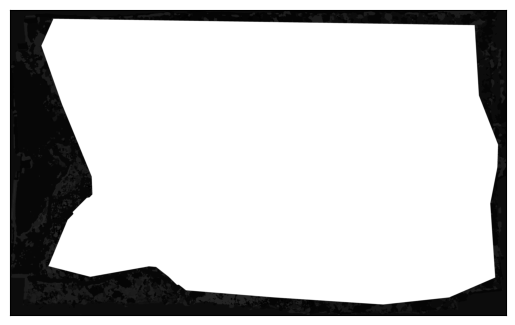

In [48]:
mask = plt.imread("../Data/mask.tif")
plt.imshow(mask, cmap='gray')
# remove ticks
plt.xticks([])
plt.yticks([])
plt.show()

In [49]:
def plot_each_channel(image):
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    for i in range(4):
        ax[i].imshow(image[:,:,i])
        ax[i].set_title("Channel {}".format(i))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.show()


## train_depth.tif e test_depth.tif

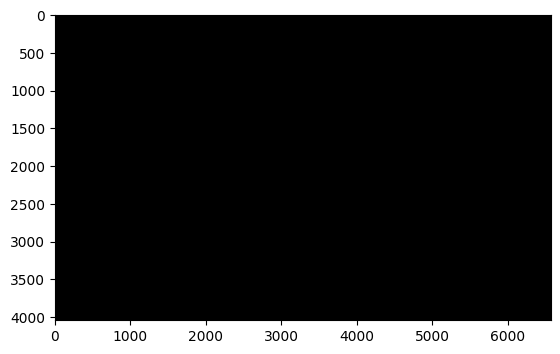

In [18]:
train = plt.imread("../MyData/train_depth.tif")
plt.imshow(train)
plt.show()

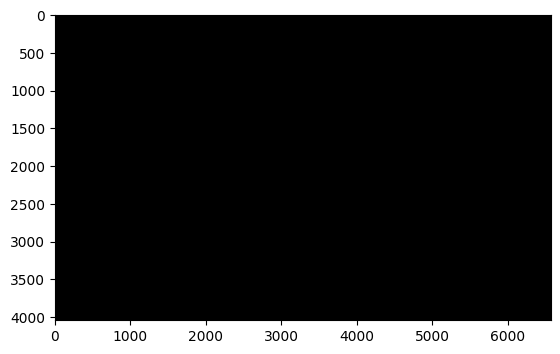

In [51]:
test = plt.imread("../Data/test_depth.tif")
plt.imshow(test)

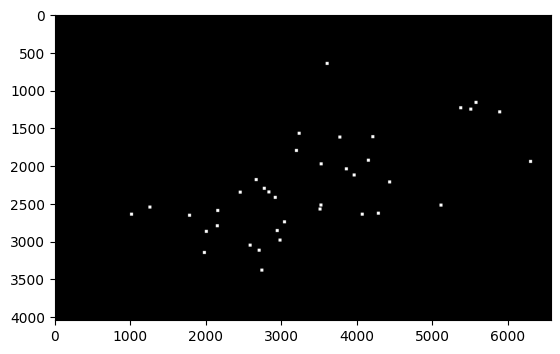

In [52]:
train_image = train[:,:, :3].copy()
dot_size = 20
for pixel_1 in np.array(np.where(train_image == 1)).T:
    train_image[pixel_1[0]-dot_size:pixel_1[0]+dot_size, pixel_1[1]-dot_size:pixel_1[1]+dot_size] = 255
    
plt.imshow(train_image)
plt.show()

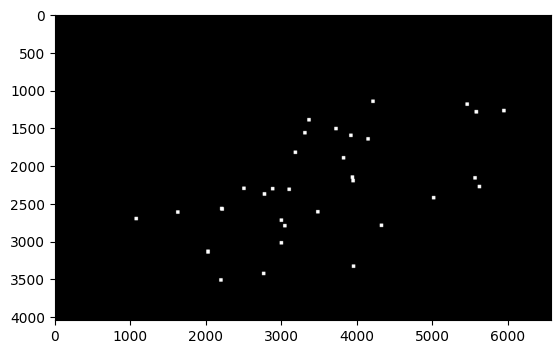

In [53]:
test_image = test[:,:, :3].copy()
dot_size = 20
for pixel_1 in np.array(np.where(test_image == 1)).T:
    test_image[pixel_1[0]-dot_size:pixel_1[0]+dot_size, pixel_1[1]-dot_size:pixel_1[1]+dot_size] = 255

plt.imshow(test_image)
plt.show()

## samples_A1_train2tif.tif e samples_A1_test2tif.tif

(4043, 6570, 4)


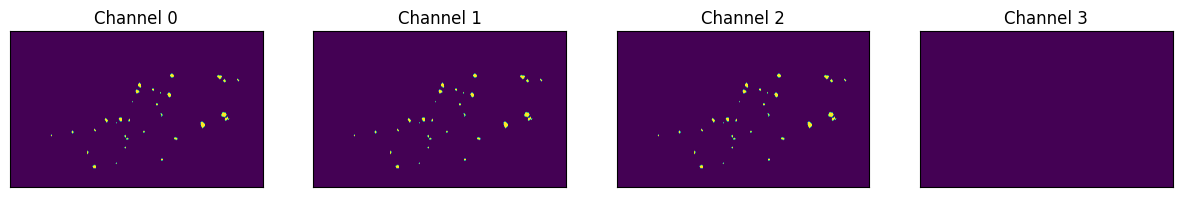

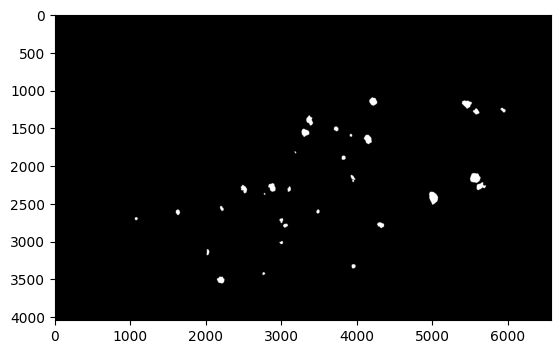

In [54]:
sample_test = plt.imread("../Data/samples_A1_test2tif.tif")
print(sample_test.shape)
plot_each_channel(sample_test)
plt.show()
plt.imshow(sample_test)
plt.show()

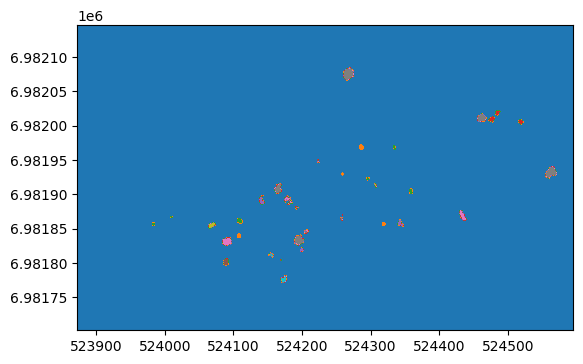

<Axes: >

In [16]:
import rasterio
from rasterio.plot import show
# read TIF
src = rasterio.open("../Data/samples_A1_train2tif.tif")

show(src, cmap=sns.color_palette("tab10", as_cmap=True))

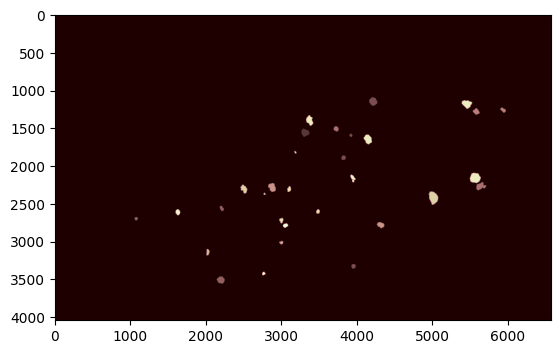

In [5]:
import rasterio
image = rasterio.open("../Data/samples_A1_test2tif.tif")
# show image
plt.imshow(image.read(1), cmap='pink')
plt.show()

(4043, 6570, 4)


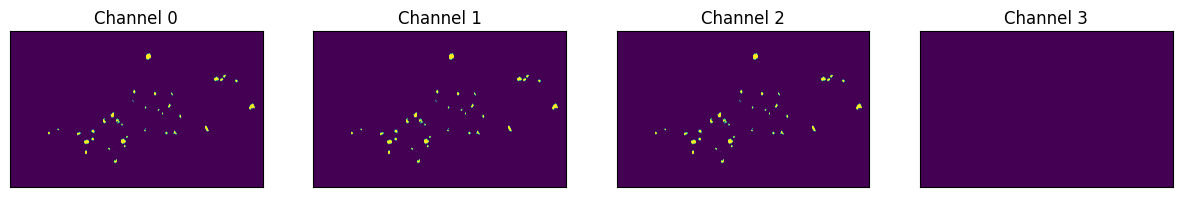

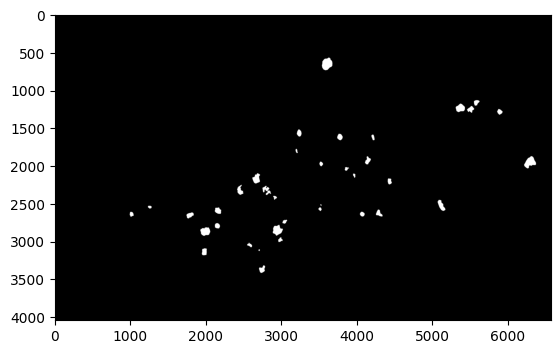

In [12]:
sample_train = plt.imread("Data/samples_A1_train2tif.tif")
print(sample_train.shape)
plot_each_channel(sample_train)
plt.show()
plt.imshow(sample_train)
plt.show()

# Test save

<Axes: >

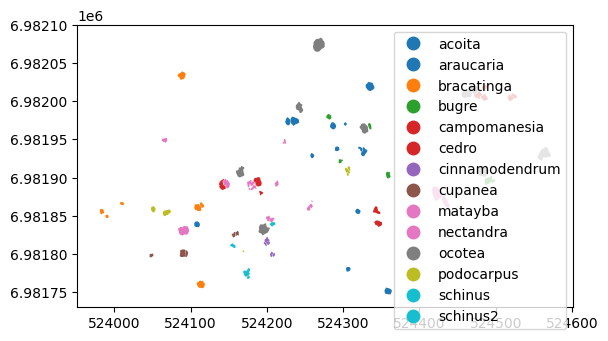

In [13]:
test_shape = gpd.read_file("Data/test_save/test.shp")
test_shape.plot(column='amostras', legend=True)


# Orthoimage

## samplesA1_new

In [14]:
import geopandas as gpd
shapefile = gpd.read_file("Data/orthoimages/samplesA1_new.shp")

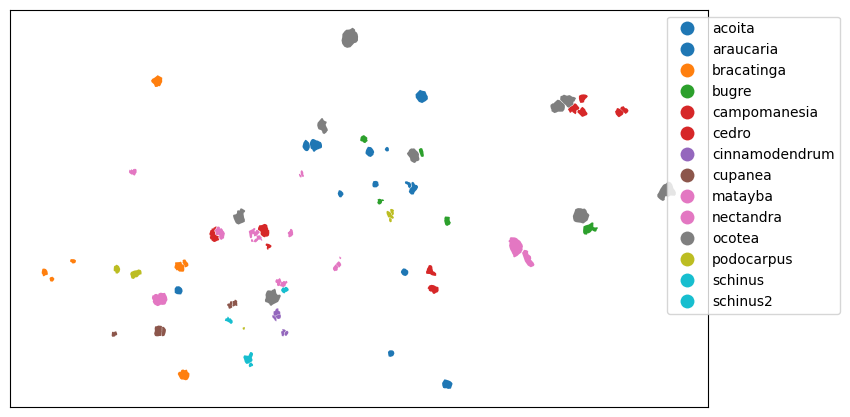

In [15]:
fig, ax = plt.subplots(figsize=(9,21))
shapefile.plot(column="amostras", ax=ax, legend=True)
# outside legend
ax.get_legend().set_bbox_to_anchor((1.2, 1))
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## ortoA1_25tiff.tif

In [ ]:

# open the source image
with rasterio.open("Data/orthoimages/ortoA1_25tiff.tif") as src:
  # read the data as a numpy array
  data = src.read()
  # get the metadata
  meta = src.meta



In [ ]:
# modify the metadata as needed
meta['driver'] = 'GTiff'
meta['dtype'] = 'float32'

# open the destination image with 'w' mode
with rasterio.open("Data/orthoimages/fixed_ortoA1_25tiff.tif", 'w', **meta) as dst:
  # write the data to the destination image
  dst.write(data)

In [50]:

# # load just one channel
# for i in range(1, 26):
#     print(i,np.max(raster.read(i)))


In [4]:
tif_raster = read_tiff("Data/orthoimages/new_ortoA1_25tiff.tif")

Data/orthoimages/new_ortoA1_25tiff.tif


In [8]:
# plt.imshow(tif_raster[0:3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


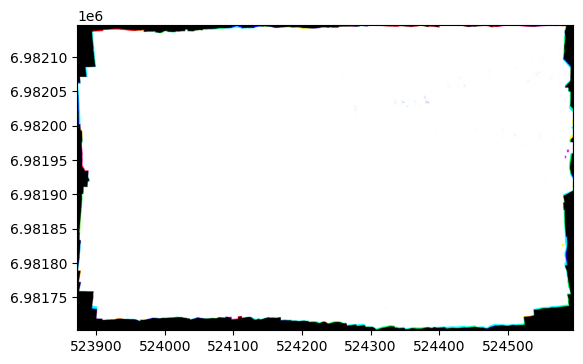

<Axes: >

In [29]:
show(raster,[5,3,2])

In [6]:
import gc
# plot each 3 channels
for i in range(3,26):
    c1 = raster.read(i-2)
    c1 = c1/np.max(c1)
    c2 = raster.read(i-1)
    c2 = c2/np.max(c2)
    c3 = raster.read(i)
    c3 = c3/np.max(c3)
    plt.imshow(np.dstack((c1,c2,c3)))
    plt.show()
    

NameError: name 'raster' is not defined

# Prediction

In [5]:
os.listdir("../exp_deeplab_v4/prediction")

['prob_map_itcFalse_0.6.npy',
 'join_class_itcFalse_1.1.TIF',
 'depth_map_itcFalse_0.4.npy',
 'prob_map_itcFalse_0.1.npy',
 'join_prob_itcFalse_1.1.TIF',
 'pred_class_itcFalse_0.1.npy',
 'pred_class_itcFalse_0.4.npy',
 'depth_map_itcFalse_0.1.npy',
 'depth_itcFalse_1.1.TIF',
 'depth_map_itcFalse_0.6.npy',
 'prob_map_itcFalse_0.4.npy',
 'pred_class_itcFalse_0.6.npy']

In [7]:
import rasterio
# read TIF
with rasterio.open("../exp_deeplab_v4/prediction/join_class_itcFalse_1.1.TIF") as src:
    # read the data as a numpy array
    data = src.read()
    # get the metadata
    meta = src.meta
plt.imshow(data[0])

RasterioIOError: ../exp_deeplab_v4/prediction/join_class_itcFalse_1.1.TIF: No such file or directory

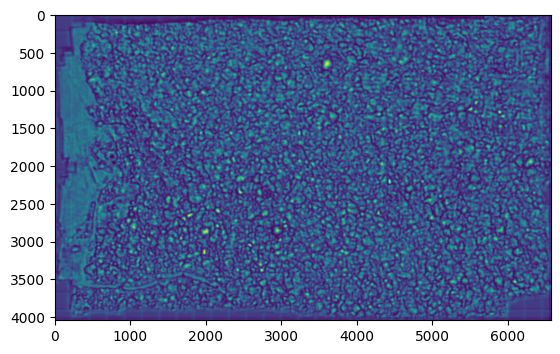

In [1]:
import rasterio
import matplotlib.pyplot as plt
with rasterio.open("/home/luiz/multi-task-fcn/exp_deeplab_v4/prediction/depth_itcFalse_1.1.TIF") as src:
    # read the data as a numpy array
    data = src.read()
    # get the metadata
    meta = src.meta

plt.imshow(data[0])

In [5]:
def plot_tif(file_path):
    with rasterio.open(file_path) as src:
        # read the data as a numpy array
        data = src.read()
        # get the metadata
        meta = src.meta
    plt.imshow(data[0])
    plt.show()

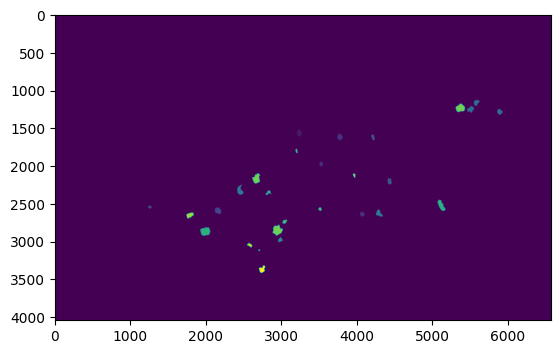

In [9]:
plot_tif("/home/luiz/multi-task-fcn/MyData/annotation/random_train_0.TIF")